# CTD instrument data for analysis

In [84]:
# -------------------
#import pandas library
# --------------------

import pandas as pd
import matplotlib.pyplot as plt


## Data Ingestion
-  data read from source  (either from Web site or txt file) for processing further analysis 
-  data can be downloaded from `https://www.dropbox.com/s/nz2xotqglirl0wy/L4_CTDf_ODV_format.txt?dl=0`
- data can also be read directly from a website that has data table using  `pd.read_table('<website link>', delimiter = ' ', on_bad_lines='skip')`


In [53]:
#-------------------------
#read data into data frame 
#------------------------

data = pd.read_table('CTDF.txt', delimiter = ' ', on_bad_lines='skip')

C:\Users\kaysn\AppData\Local\Temp\ipykernel_22852\1358696024.py:5: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table('CTDF.txt', delimiter = ' ', on_bad_lines='skip')


In [48]:
#--------------
#Preview data
#-------------

data.head()

,Cruise,Station,Type,DateTime,Lat,Lon,Depth,Temperature,Transmission,PAR,Fluorescence,Density,Oxygen,Salinity,Turbidity
0,CCC,SS,T,yyyy-mm-ddThh:mm:ss.sss,degN,degE,m,degC,%,uE/m2/s,volts,kg/m3,uM,PSU,NTU
1,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,48.000,10.6825,NaN,NaN,2.0286,1027.2241,NaN,35.2221,NaN
2,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,47.500,10.6827,NaN,NaN,2.0396,1027.2219,NaN,35.2222,NaN
3,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,47.000,10.6826,NaN,NaN,1.9936,1027.2198,NaN,35.2224,NaN
4,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,46.500,10.6828,NaN,NaN,2.0387,1027.2175,NaN,35.2224,NaN


In [54]:
# -----------------------------------------------
# Remove first row which contain measurement units
# And convert columns to lowercase
#------------------------------------------------

data = data.iloc[1: , :]
data.columns = data.columns.str.lower()

In [50]:
data.shape

(136769, 15)

In [55]:
data.head()

,cruise,station,type,datetime,lat,lon,depth,temperature,transmission,par,fluorescence,density,oxygen,salinity,turbidity
1,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,48.000,10.6825,NaN,NaN,2.0286,1027.2241,NaN,35.2221,NaN
2,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,47.500,10.6827,NaN,NaN,2.0396,1027.2219,NaN,35.2222,NaN
3,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,47.000,10.6826,NaN,NaN,1.9936,1027.2198,NaN,35.2224,NaN
4,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,46.500,10.6828,NaN,NaN,2.0387,1027.2175,NaN,35.2224,NaN
5,WCO,L4,c,2002-01-07T12:00:00.000,50.25174,-4.22056,46.000,10.6826,NaN,NaN,2.0234,1027.2152,NaN,35.2224,NaN


In [60]:
data.shape

(136750, 15)

In [57]:
# --------------------------------------------------------------
## Convert datetime column to date type and skipping error value
# --------------------------------------------------------------

data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data = data.dropna(subset=['datetime'])



In [58]:
data.shape

(136750, 15)

In [59]:
data.dtypes

cruise                  object
station                 object
type                    object
datetime        datetime64[ns]
lat                     object
lon                     object
depth                   object
temperature             object
transmission            object
par                     object
fluorescence            object
density                 object
oxygen                  object
salinity                object
turbidity               object
dtype: object

# Feature engineering and data conversion

In [68]:
data['recorded_year'] = data['datetime'].dt.year
data['recorded_month'] = data['datetime'].dt.month
data['recorded_day'] = data['datetime'].dt.day

In [65]:
data['lat'] =  data['lat'].astype(str).astype(float)
data['lon'] =  data['lon'].astype(str).astype(float)
data['depth'] =  data['depth'].astype(str).astype(float)
data['temperature'] =  data['temperature'].astype(str).astype(float)
data['transmission'] =  data['transmission'].astype(str).astype(float)
data['fluorescence'] =  data['fluorescence'].astype(str).astype(float)
data['density'] =  data['density'].astype(str).astype(float)
data['oxygen'] =  data['oxygen'].astype(str).astype(float)
data['salinity'] =  data['salinity'].astype(str).astype(float)
data['turbidity'] =  data['turbidity'].astype(str).astype(float)

In [69]:
data.dtypes

cruise                    object
station                   object
type                      object
datetime          datetime64[ns]
lat                      float64
lon                      float64
depth                    float64
temperature              float64
transmission             float64
par                       object
fluorescence             float64
density                  float64
oxygen                   float64
salinity                 float64
turbidity                float64
recorded_year              int64
recorded_month             int64
recorded_day               int64
dtype: object

In [71]:
data.head(3)

,cruise,station,type,datetime,lat,lon,depth,temperature,transmission,par,fluorescence,density,oxygen,salinity,turbidity,recorded_year,recorded_month,recorded_day
1,WCO,L4,c,2002-01-07 12:00:00,50.25174,-4.22056,48.0,10.6825,NaN,NaN,2.0286,1027.2241,NaN,35.2221,NaN,2002,1,7
2,WCO,L4,c,2002-01-07 12:00:00,50.25174,-4.22056,47.5,10.6827,NaN,NaN,2.0396,1027.2219,NaN,35.2222,NaN,2002,1,7
3,WCO,L4,c,2002-01-07 12:00:00,50.25174,-4.22056,47.0,10.6826,NaN,NaN,1.9936,1027.2198,NaN,35.2224,NaN,2002,1,7


# Example information extraction 

In [73]:
# -------------------------------------------
## Highest and lowest surface temperature  per year
# -------------------------------------------

df = data.groupby(['recorded_year'], as_index=False)['temperature'].max()
df

,recorded_year,temperature
0,2002,17.2188
1,2003,18.2797
2,2004,18.9655
3,2005,17.0301
4,2006,17.7769
5,2007,17.0349
6,2008,17.5757
7,2009,16.9685
8,2010,17.0732
9,2011,16.9495


In [74]:
df = data.groupby(['recorded_year'], as_index=False)['temperature'].min()
df

,recorded_year,temperature
0,2002,10.1186
1,2003,8.6431
2,2004,-0.0000
3,2005,8.4434
4,2006,7.4240
5,2007,10.1365
6,2008,9.4422
7,2009,7.9653
8,2010,7.3288
9,2011,-9.9990


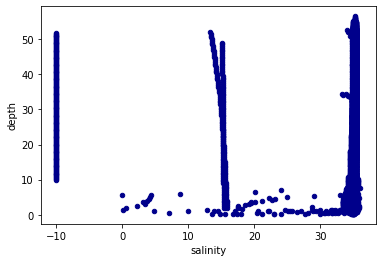

In [83]:
# ---------------------------------------------------
## exploring possible link between depth and salinity
# --------------------------------------------------

ax1 = data.plot.scatter(x='salinity', y='depth', c='DarkBlue')

Text(0.5, 1.0, 'Recorded depth by month year 2021')

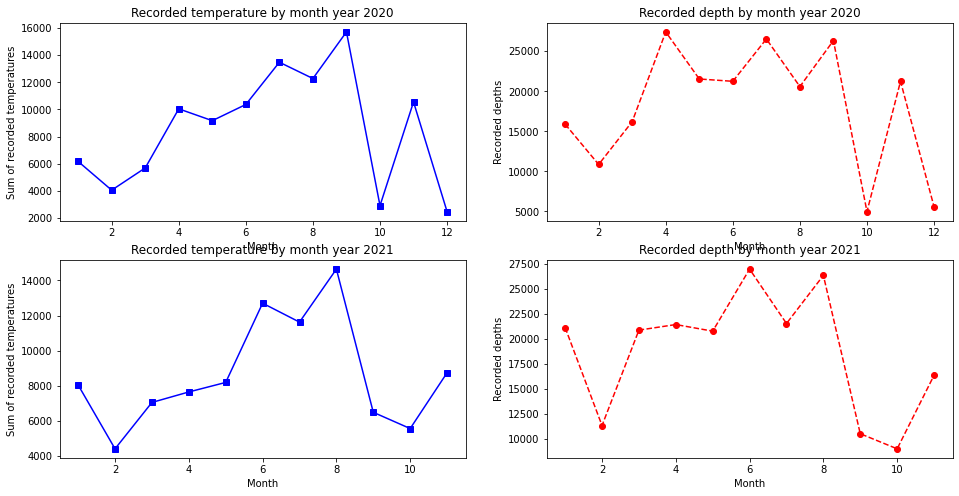

In [92]:
# -------------------------------------------
## Seasonal change in temperature and depth 2020 - 2021 
# -------------------------------------------
data_2020 =  data[data['recorded_year'] == 2020]
data_2021 =  data[data['recorded_year'] == 2021]

temperature_2020 = data_2020[['recorded_month', 'temperature']].groupby(by='recorded_month').sum()
depth_2020 = data_2020[['recorded_month', 'depth']].groupby(by='recorded_month').sum()

temperature_2021 = data_2021[['recorded_month', 'temperature']].groupby(by='recorded_month').sum()
depth_2021 = data_2021[['recorded_month', 'depth']].groupby(by='recorded_month').sum()


fig, axes = plt.subplots(2,2, figsize=(16, 8))


axes[0,0].plot(temperature_2020.temperature, 's-b')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Sum of recorded temperatures')
axes[0,0].set_title('Recorded temperature by month year 2020')


axes[0,1].plot(depth_2020.depth,  'o--r')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Recorded depths')
axes[0,1].set_title('Recorded depth by month year 2020')

axes[1,0].plot(temperature_2021.temperature, 's-b')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Sum of recorded temperatures')
axes[1,0].set_title('Recorded temperature by month year 2021')


axes[1,1].plot(depth_2021.depth,  'o--r')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Recorded depths')
axes[1,1].set_title('Recorded depth by month year 2021')

In [ ]:
# -------------------------------------------
## Used to load data into data base if needed 
# -------------------------------------------


# import sqlite3
# conn = sqlite3.connect('CTDF_DB.sqlite')
# c = conn.cursor()

# try:
#     c.execute('CREATE TABLE IF NOT EXISTS Data (Cruise text, Station text, Type text, DateTime datetime, Lat number, Lon number, Depth number, Temperature number, Transmission text, PAR text, Fluorescence number, Density number, Oxygen number, Salinity number, Turbidity number)')
#     conn.commit()
# except Exception as e:
#     print("Error occurred: ", e)
# finally:
#     # conn.close()
#     print("Done")

# data.to_sql('Data', conn, if_exists='replace', index = False)